In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

In [21]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False, # excludes final classfication layer as we will add our own custom layer to classify the dogs
    input_shape=(224, 224, 3) # expect images to be resized to 224 x 224, 3 color channels
)

In [22]:
# the layers of the pre-trained model will not be updated during training
# only train the new layers that are added on top
base_model.trainable = False

In [23]:
# adding custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # reduces the dimensions of the feature maps
    layers.Dense(128, activation='relu'), # a fully connected layer with 128 units and a ReLU activation function
    layers.Dense(2, activation='softmax')  # 2 classes: Dog 1 and Dog 2
])

In [24]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Preparing the Dataset Using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [26]:
train_generator = train_datagen.flow_from_directory(
    os.path.abspath('./data/train/'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [27]:
model.fit(train_generator, epochs=10)

C:\Users\yenla\AppsByYen\GepperPinger\training\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 694ms/step - accuracy: 0.5943 - loss: 0.6170
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.9422 - loss: 0.1371
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 574ms/step - accuracy: 0.9887 - loss: 0.0462
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.9896 - loss: 0.0348
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 534ms/step - accuracy: 0.9922 - loss: 0.0265
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 557ms/step - accuracy: 1.0000 - loss: 0.0143
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 522ms/step - accuracy: 0.9944 - loss: 0.0133
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 534ms/step - accuracy: 1.0000 - loss: 0.0135
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step - accuracy: 1.0000 - loss: 0.0089
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 1.0000 - loss: 0.0041


In [28]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    os.path.abspath('./data/test/'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 20 images belonging to 2 classes.


In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0227
Test Loss: 0.022662248462438583
Test Accuracy: 1.0


In [30]:
model.save(os.path.join(os.path.abspath('./trained_models/'), 'dog_identifier_new.h5'))

In [31]:
class_names = list(test_generator.class_indices.keys())

# Get predictions
y_pred = model.predict(test_generator, verbose=1)
y_true = test_generator.classes  # Actual labels from the test generator
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes (not probabilities)

# Find incorrectly classified images
incorrect_predictions = np.where(y_pred_classes != y_true)[0]
correct_predictions = np.where(y_pred_classes == y_true)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Number of images correctly predicted: 8
Number of images correctly predicted: 12


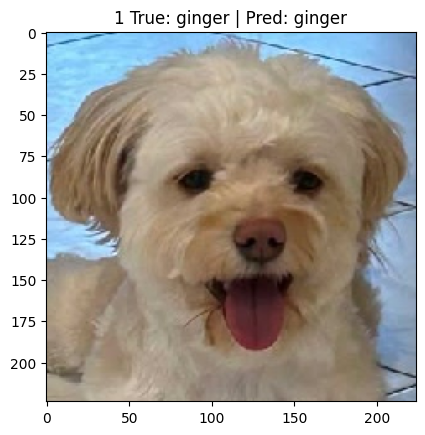

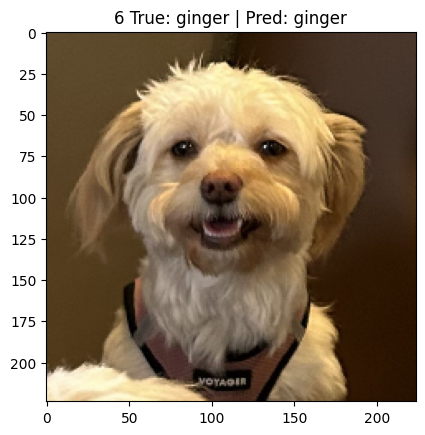

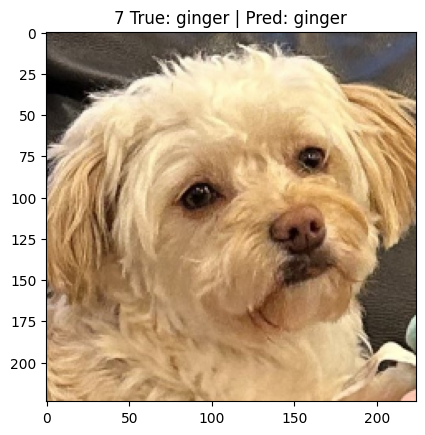

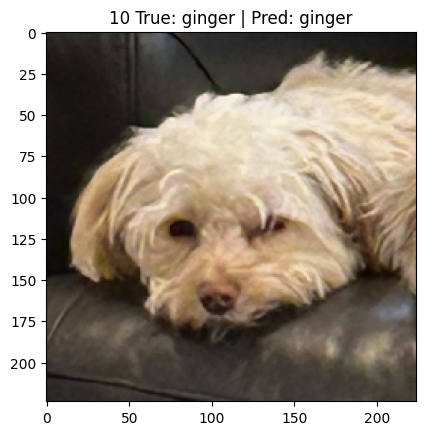

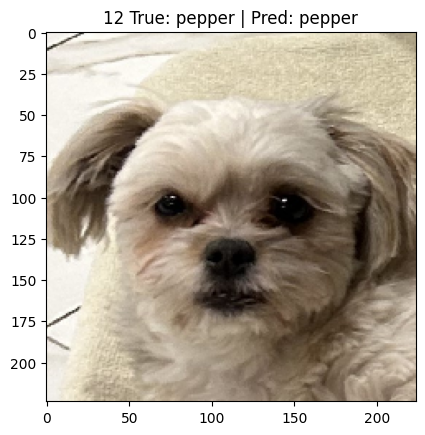

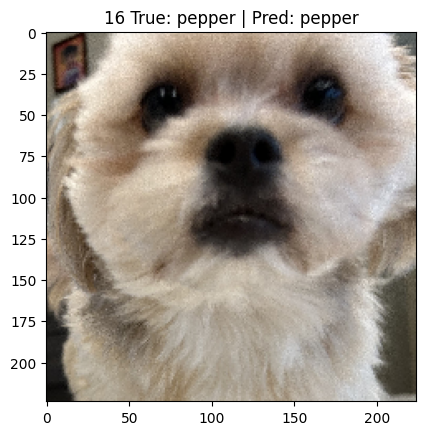

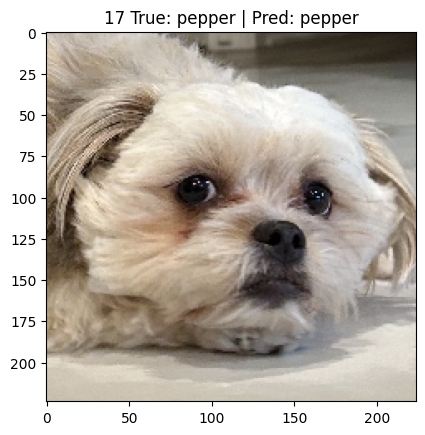

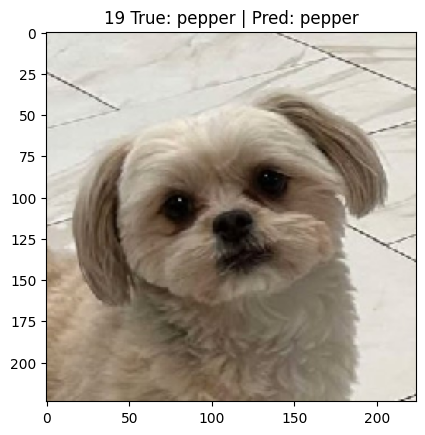

In [32]:
print(f"Number of images correctly predicted: {len(correct_predictions)}")
print(f"Number of images incorrectly predicted: {len(incorrect_predictions)}")


for idx in correct_predictions:
    # Get the image filename and label
    img_path = os.path.join(test_generator.directory, test_generator.filenames[idx])
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust to your image size
    true_label = y_true[idx]
    predicted_label = y_pred_classes[idx]
    
    # Print image, true label, and predicted label
    plt.imshow(img)
    plt.title(f"{idx+1} True: {class_names[true_label]} | Pred: {class_names[predicted_label]}")
    plt.show()

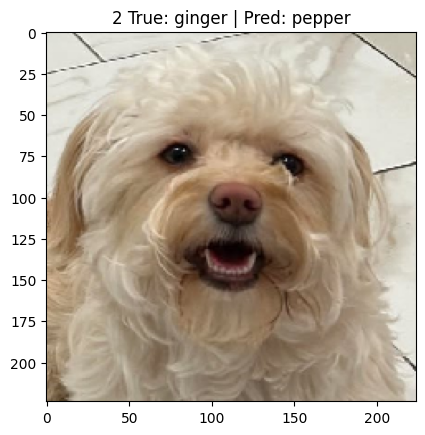

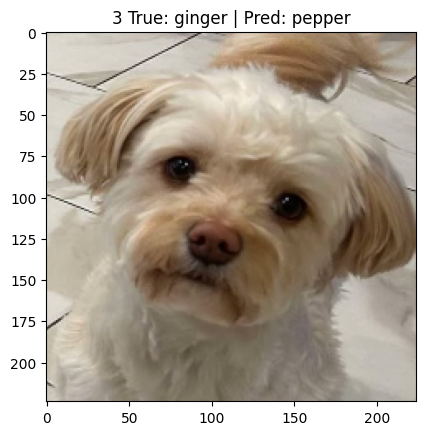

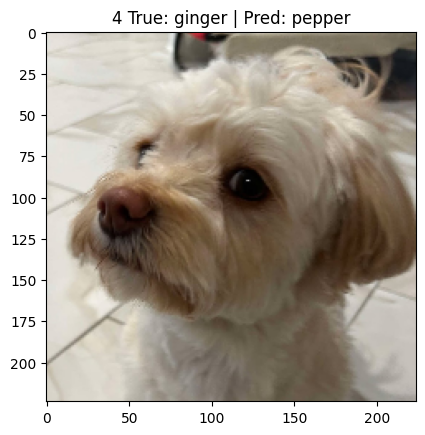

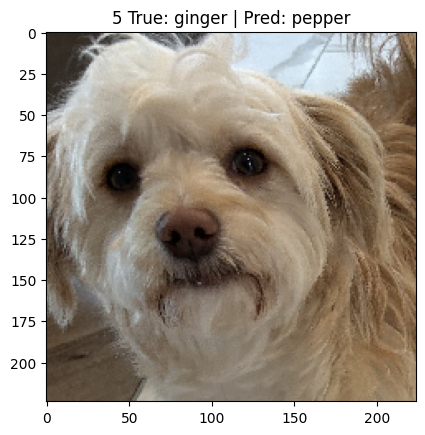

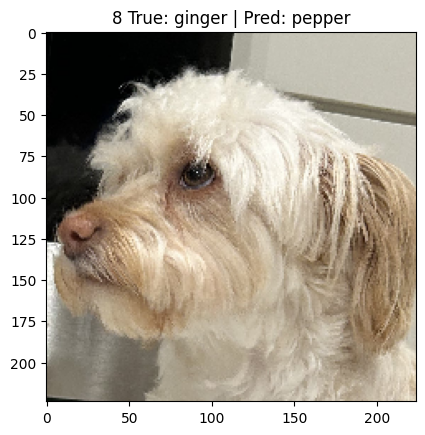

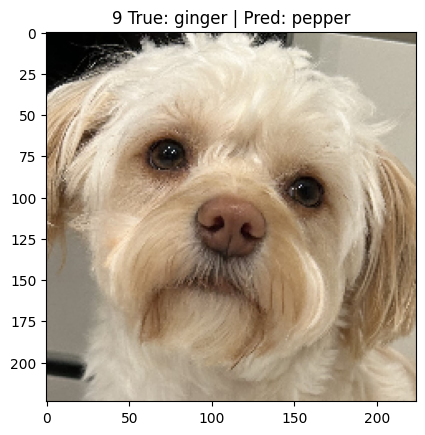

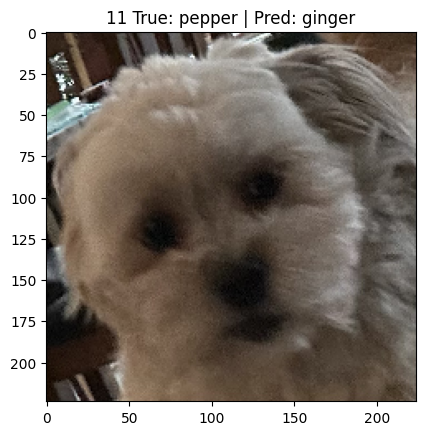

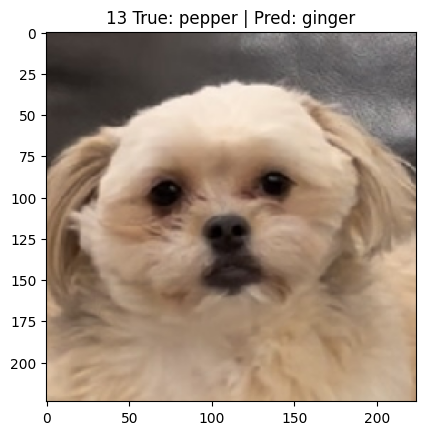

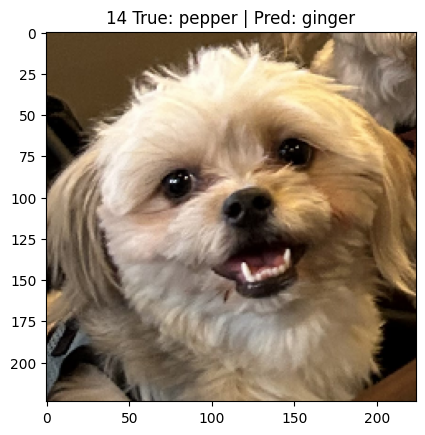

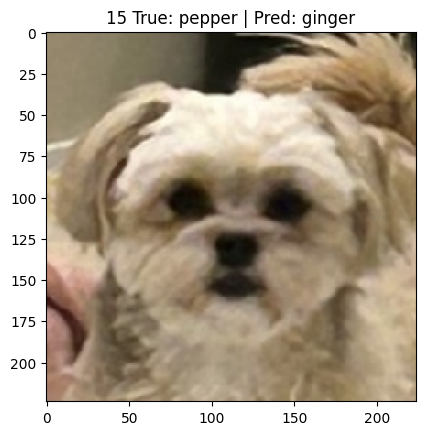

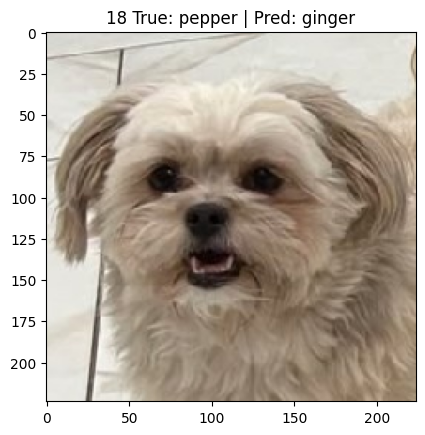

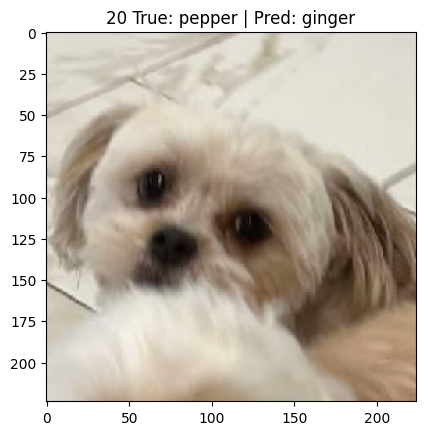

In [33]:

for idx in incorrect_predictions:
    # Get the image filename and label
    img_path = os.path.join(test_generator.directory, test_generator.filenames[idx])
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust to your image size
    true_label = y_true[idx]
    predicted_label = y_pred_classes[idx]
    
    # Print image, true label, and predicted label
    plt.imshow(img)
    plt.title(f"{idx+1} True: {class_names[true_label]} | Pred: {class_names[predicted_label]}")
    plt.show()